In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#from sklearn.datasets import make_classification
#from sklearn.model_selection import cross_val_score
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline

In [3]:
data_train =  pd.read_csv('train.csv')
data_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
data_train.isnull().sum()  ## no null values

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [5]:
data_test =  pd.read_csv('test.csv')
data_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [6]:
#Checking the dataset description
describe = data_train.describe()
describe.transpose()

,count,mean,std,min,25%,50%,75%,max
id,7905.0,3952.000000,2282.121272,0.00,1976.00,3952.00,5928.00,7904.00
N_Days,7905.0,2030.173308,1094.233744,41.00,1230.00,1831.00,2689.00,4795.00
Age,7905.0,18373.146490,3679.958739,9598.00,15574.00,18713.00,20684.00,28650.00
Bilirubin,7905.0,2.594485,3.812960,0.30,0.70,1.10,3.00,28.00
Cholesterol,7905.0,350.561923,195.379344,120.00,248.00,298.00,390.00,1775.00
Albumin,7905.0,3.548323,0.346171,1.96,3.35,3.58,3.77,4.64
Copper,7905.0,83.902846,75.899266,4.00,39.00,63.00,102.00,588.00
Alk_Phos,7905.0,1816.745250,1903.750657,289.00,834.00,1181.00,1857.00,13862.40
SGOT,7905.0,114.604602,48.790945,26.35,75.95,108.50,137.95,457.25
Tryglicerides,7905.0,115.340164,52.530402,33.00,84.00,104.00,139.00,598.00


Status
C     4965
D     2665
CL     275
Name: count, dtype: int64


C:\Users\NEENU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\NEENU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\NEENU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


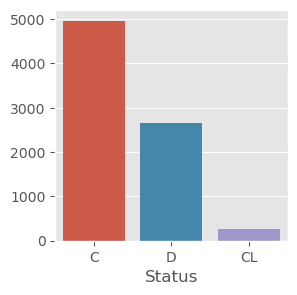

In [7]:
cirrhosis_counts = data_train['Status'].value_counts()
print(cirrhosis_counts)
fig, ax = plt.subplots(figsize=(3, 3))
fig = sns.barplot(x= cirrhosis_counts.index, y= cirrhosis_counts.values, ax=ax)

    C (censored) indicates the patient was alive at N_Days.
    D indicates the patient was deceased at N_Days.
    CL indicates the patient was alive at N_Days due to liver a transplant.

In [8]:
X=data_train.iloc[:,1:-1].values #  first and last columns not inculded
y=data_train.iloc[:,-1].values  # only last - target


X_test=data_test.iloc[:,1:].values  # only first column not inculded  X_sub

In [9]:
#""" convert to numberical values
for i in range(X.shape[1]):
    le = LabelEncoder()
    X_test[:,i] = le.fit_transform(X_test[:, i])
    X[:,i] = le.fit_transform(X[:, i])
    
print(type(X))
print(type(X_test))
#"""

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X[:,1:])
X_test = sc.transform(X_test[:,1:])

In [18]:
accuracy_list = []

In [19]:

"""
#logistic regression

log_reg = LogisticRegression()
log_reg.fit(X,y)
log_reg_pred = log_reg.predict(X)
fpr1, tpr1, thresholds = roc_curve(y, log_reg_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

log_reg_acc = accuracy_score(y, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
"""

'\n#logistic regression\n\nlog_reg = LogisticRegression()\nlog_reg.fit(X,y)\nlog_reg_pred = log_reg.predict(X)\nfpr1, tpr1, thresholds = roc_curve(y, log_reg_pred, pos_label=1)\nroc_auc1 = auc(fpr1, tpr1)\n\nlog_reg_acc = accuracy_score(y, log_reg_pred)\naccuracy_list.append(100*log_reg_acc)\n'

In [20]:
"""
# svc

sv_clf = SVC()
sv_clf.fit(X,y)
sv_clf_pred = sv_clf.predict(X)
fpr2, tpr2, thresholds = roc_curve(y, sv_clf_pred, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)

sv_clf_acc = accuracy_score(y, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)
"""

'\n# svc\n\nsv_clf = SVC()\nsv_clf.fit(X,y)\nsv_clf_pred = sv_clf.predict(X)\nfpr2, tpr2, thresholds = roc_curve(y, sv_clf_pred, pos_label=1)\nroc_auc2 = auc(fpr2, tpr2)\n\nsv_clf_acc = accuracy_score(y, sv_clf_pred)\naccuracy_list.append(100* sv_clf_acc)\n'

In [21]:
"""
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X,y)
dt_pred = kn_clf.predict(X)
fpr3, tpr3, thresholds = roc_curve(y, dt_pred, pos_label=1)
roc_auc3 = auc(fpr3, tpr3)

kn_acc = accuracy_score(y, kn_pred)
accuracy_list.append(100*kn_acc)
"""

'\n# K Neighbors Classifier\n\nkn_clf = KNeighborsClassifier(n_neighbors=6)\nkn_clf.fit(X,y)\ndt_pred = kn_clf.predict(X)\nfpr3, tpr3, thresholds = roc_curve(y, dt_pred, pos_label=1)\nroc_auc3 = auc(fpr3, tpr3)\n\nkn_acc = accuracy_score(y, kn_pred)\naccuracy_list.append(100*kn_acc)\n'

In [22]:
"""
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X,y)
dt_pred = dt_clf.predict(X)
fpr4, tpr4, thresholds = roc_curve(y, dt_pred, pos_label=1)
roc_auc4 = auc(fpr4, tpr4)

dt_acc = accuracy_score(y, dt_pred)
accuracy_list.append(100*dt_acc)
"""

"\n# Decision Tree Classifier\n\ndt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')\ndt_clf.fit(X,y)\ndt_pred = dt_clf.predict(X)\nfpr4, tpr4, thresholds = roc_curve(y, dt_pred, pos_label=1)\nroc_auc4 = auc(fpr4, tpr4)\n\ndt_acc = accuracy_score(y, dt_pred)\naccuracy_list.append(100*dt_acc)\n"

In [23]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X, y)
r_pred = r_clf.predict(X)
r_probabilty = r_clf.predict_proba(X)
#fpr5, tpr5, thresholds = roc_curve(y, r_pred, pos_label=1)
#roc_auc5 = auc(fpr5, tpr5)

r_acc = accuracy_score(y, r_pred)
accuracy_list.append(100*r_acc)

In [24]:
"""
# xgbrf classifier

xgb_clf = XGBRFClassifier(max_depth=2,learning_rate=0.1,
    n_estimators=143, subsample=0.74, colsample_bytree=1.0, objective='multi:softprob', num_class=3 )
xgb_clf.fit(X,y)
xgb_pred = xgb_clf.predict(X)
xgb_probabilty = xgb_clf.predict_proba(X)
xgb_acc = accuracy_score(y, xgb_pred)
accuracy_list.append(100*xgb_acc)
"""

"\n# xgbrf classifier\n\nxgb_clf = XGBRFClassifier(max_depth=2,learning_rate=0.1,\n    n_estimators=143, subsample=0.74, colsample_bytree=1.0, objective='multi:softprob', num_class=3 )\nxgb_clf.fit(X,y)\nxgb_pred = xgb_clf.predict(X)\nxgb_probabilty = xgb_clf.predict_proba(X)\nxgb_acc = accuracy_score(y, xgb_pred)\naccuracy_list.append(100*xgb_acc)\n"

In [25]:
#print(accuracy_list) 
#model_list = ['Logistic Regression', 'SVC','DecisionTree', 'RandomForest', 'XGBRF ']
#[80.11385199240986, 82.94750158127768, 76.71094244149272, 98.25426944971537, 77.00189753320683]

In [26]:
#model_list = ['Logistic Regression', 'SVC','DecisionTree', 'RandomForest', 'XGBRF ']
# dictionary of lists 
#dict = {'Accuracy': np.round(accuracy_list, 2)} 
    
#classifer = pd.DataFrame(dict, index = model_list)
    
#classifer

	Accuracy
    - Logistic Regression	80.11
    - SVC	82.95
    - DecisionTree	76.71
    - RandomForest	98.25
    - XGBRF	77.00

In [32]:
# Calculate log loss
logloss = log_loss(y, r_probabilty)
print(f'Log Loss: ', logloss)

Log Loss:  0.15088120196000607


In [33]:
y_predict = r_clf.predict_proba(X_test)
print(y_predict)

[[0.74133054 0.02945391 0.22921555]
 [0.74460907 0.08669328 0.16869765]
 [0.23333333 0.07006494 0.69660173]
 ...
 [0.88730509 0.01541764 0.09727726]
 [0.97614109 0.0036986  0.02016031]
 [0.21998124 0.06075    0.71926876]]


In [35]:
result = np.column_stack((data_test.iloc[:, 0].astype(int), y_predict))
result = pd.DataFrame(result, columns=['id', 'Status_C', 'Status_CL', 'Status_D'])
print(result)

           id  Status_C  Status_CL  Status_D
0      7905.0  0.741331   0.029454  0.229216
1      7906.0  0.744609   0.086693  0.168698
2      7907.0  0.233333   0.070065  0.696602
3      7908.0  0.873091   0.003527  0.123383
4      7909.0  0.582465   0.083305  0.334231
...       ...       ...        ...       ...
5266  13171.0  0.793863   0.109116  0.097021
5267  13172.0  0.927463   0.024103  0.048434
5268  13173.0  0.887305   0.015418  0.097277
5269  13174.0  0.976141   0.003699  0.020160
5270  13175.0  0.219981   0.060750  0.719269

[5271 rows x 4 columns]


In [36]:
result["id"] = result["id"].apply(np.int32)
type(result['id'])

pandas.core.series.Series

In [37]:
display(result.dtypes)

id             int32
Status_C     float64
Status_CL    float64
Status_D     float64
dtype: object

In [38]:
result.to_csv('output.csv', index=False)
result.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.741331,0.029454,0.229216
1,7906,0.744609,0.086693,0.168698
2,7907,0.233333,0.070065,0.696602
3,7908,0.873091,0.003527,0.123383
4,7909,0.582465,0.083305,0.334231
